WALMART PROJET

In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, classification_report
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

In [3]:
dataset = pd.read_csv("Walmart_Store_sales.csv")

In [4]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07-01-2011,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [5]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['dayofweek'] = pd.DatetimeIndex(dataset['Date']).dayofweek
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day


In [6]:
mask=dataset['Weekly_Sales'].isnull()
dataset.loc[~mask]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,dayofweek,day
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,4.0,18.0
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,4.0,25.0
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,4.0,28.0
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,4.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010.0,6.0,4.0,18.0
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN,NaN,NaN,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN,2010.0,11.0,5.0,6.0
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN,2011.0,12.0,3.0,8.0


In [7]:
dataset=dataset.dropna()
dataset.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,dayofweek,day
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,4.0,25.0
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,4.0,28.0
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658,2011.0,3.0,6.0,6.0
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023623,6.961,2012.0,3.0,4.0,2.0
10,8.0,19-08-2011,895066.50,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,4.0,19.0
11,18.0,15-10-2010,1029618.10,0.0,52.02,2.878,132.763355,9.331,2010.0,10.0,4.0,15.0
12,7.0,13-05-2011,414094.05,0.0,36.61,3.767,192.826069,8.595,2011.0,5.0,4.0,13.0
13,1.0,16-03-2012,1677472.78,0.0,64.74,3.734,221.211813,7.348,2012.0,3.0,4.0,16.0
14,17.0,01-10-2010,829207.27,0.0,60.07,2.853,126.234600,6.885,2010.0,1.0,6.0,10.0
20,7.0,02-04-2010,561145.14,0.0,38.26,2.725,189.704822,8.963,2010.0,2.0,3.0,4.0


In [8]:
dataset=dataset.reindex(columns = ['Store','Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','year','month','dayofweek','day','Weekly_Sales'])
dataset.head(20)

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,dayofweek,day,Weekly_Sales
1,13.0,25-03-2011,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,4.0,25.0,1807545.43
4,6.0,28-05-2010,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,4.0,28.0,1644470.66
6,15.0,03-06-2011,0.0,69.80,4.069,134.855161,7.658,2011.0,3.0,6.0,6.0,695396.19
7,20.0,03-02-2012,0.0,39.93,3.617,213.023623,6.961,2012.0,3.0,4.0,2.0,2203523.20
10,8.0,19-08-2011,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,4.0,19.0,895066.50
11,18.0,15-10-2010,0.0,52.02,2.878,132.763355,9.331,2010.0,10.0,4.0,15.0,1029618.10
12,7.0,13-05-2011,0.0,36.61,3.767,192.826069,8.595,2011.0,5.0,4.0,13.0,414094.05
13,1.0,16-03-2012,0.0,64.74,3.734,221.211813,7.348,2012.0,3.0,4.0,16.0,1677472.78
14,17.0,01-10-2010,0.0,60.07,2.853,126.234600,6.885,2010.0,1.0,6.0,10.0,829207.27
20,7.0,02-04-2010,0.0,38.26,2.725,189.704822,8.963,2010.0,2.0,3.0,4.0,561145.14


In [9]:
dataset.drop(['Date'], axis=1)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,dayofweek,day,Weekly_Sales
1,13.0,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,4.0,25.0,1807545.43
4,6.0,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,4.0,28.0,1644470.66
6,15.0,0.0,69.80,4.069,134.855161,7.658,2011.0,3.0,6.0,6.0,695396.19
7,20.0,0.0,39.93,3.617,213.023623,6.961,2012.0,3.0,4.0,2.0,2203523.20
10,8.0,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,4.0,19.0,895066.50
...,...,...,...,...,...,...,...,...,...,...,...
139,7.0,0.0,50.60,3.804,197.588605,8.090,2012.0,5.0,4.0,25.0,532739.77
143,3.0,0.0,78.53,2.705,214.495838,7.343,2010.0,4.0,1.0,6.0,396968.80
144,3.0,0.0,73.44,3.594,226.968844,6.034,2012.0,10.0,4.0,19.0,424513.08
145,14.0,0.0,72.62,2.780,182.442420,8.899,2010.0,6.0,4.0,18.0,2248645.59


## Q1: Which store has minimum and maximum sales?



<AxesSubplot:title={'center':'Store vs Weekly Sales'}, xlabel='Store'>

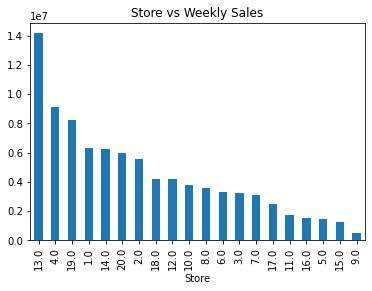

In [10]:
dataset.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False).plot.bar(x="Store", y="Weekly Sales", title="Store vs Weekly Sales")

We can clearly see that the Store 13 has maximum Weekly_Sales and 9 minimum sales.

## Q2: Which store has maximum standard deviation i.e., the sales vary a lot?

In [11]:
dataset_std = dataset.groupby(['Store'])['Weekly_Sales'].std().sort_values(ascending=False)
dataset_std.head()

Store
4.0     353646.097229
13.0    213093.096912
20.0    202561.872565
12.0    174579.310202
14.0    154704.816384
Name: Weekly_Sales, dtype: float64

The store has maximum standard deviation is 4 with 353646.097229$

In [12]:
import seaborn as sns 

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

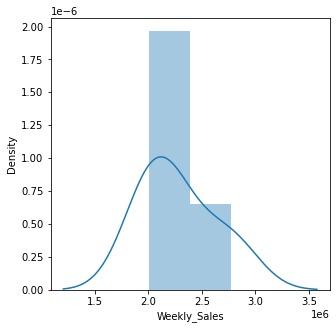

In [13]:
stores = dataset.groupby('Store')
store_4 = stores.get_group(4)
plt.figure(figsize=(5,5))
sns.distplot(store_4.Weekly_Sales)

In [14]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(dataset.groupby('Store')['Weekly_Sales'].std() / dataset.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std

,Coefficient of mean to standard deviation
Store,
1.0,0.053989
2.0,0.043682
3.0,0.081941
4.0,0.155134
5.0,0.069963
6.0,0.002201
7.0,0.135540
8.0,0.073064
9.0,NaN


Analyse 2 - Maximum Std is for store 4 and coefficient of variation is max for store 16, to draw more insights refer the plot

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

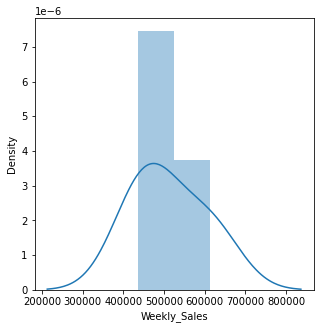

In [15]:
stores = dataset.groupby('Store')
store_16 = stores.get_group(16)
plt.figure(figsize=(5,5))
sns.distplot(store_16.Weekly_Sales)

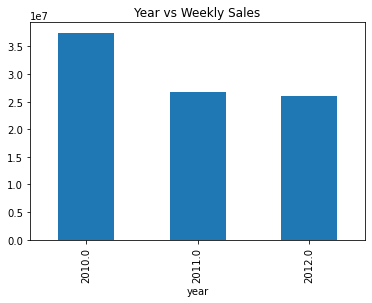

In [16]:
dataset1 = dataset.groupby(['year'])['Weekly_Sales'].sum().plot.bar(x="year", y="Weekly_Sales", title="Year vs Weekly Sales")


## Q3-Which store has highest sales in holiday ?

<AxesSubplot:title={'center':'Store Vs Sales for 2010'}, xlabel='Store'>

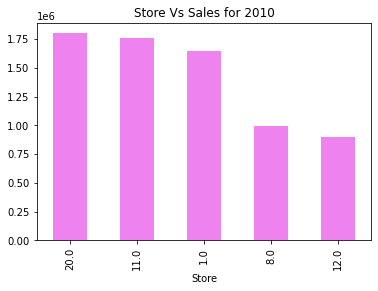

In [17]:
dataset2 = dataset[(dataset['Holiday_Flag'] == 1)&(dataset['year']==2010) ]
dataset2.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(10).plot.bar(color='violet', title = 'Store Vs Sales for 2010')

<AxesSubplot:title={'center':'Store Vs Sales for 2012'}, xlabel='Store'>

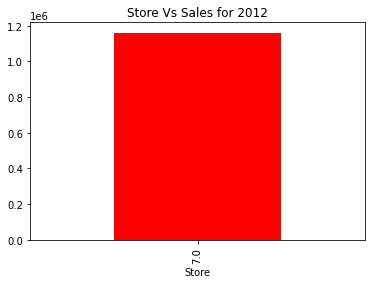

In [18]:
dataset5 = dataset[(dataset['Holiday_Flag'] == 1)&(dataset['year']==2012) ]
dataset5.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(10).plot.bar(color='red', title = 'Store Vs Sales for 2012')

Store 7 has the highest weekly sales in the year 2012 in holiday

## Which days of the week have the highest sales?

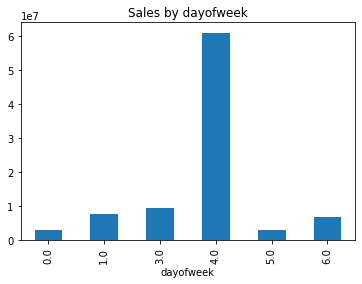

In [19]:
dataset.groupby(['dayofweek'])['Weekly_Sales'].sum().plot(kind = 'bar')
plt.title("Sales by dayofweek")
plt.show()


Friday is the day with highest sales.

## Q4-Which month has the highest sales?

<AxesSubplot:xlabel='month'>

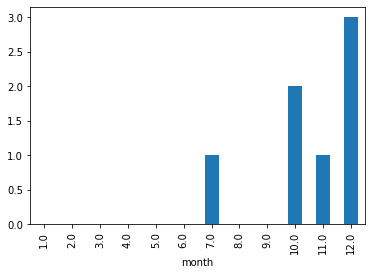

In [20]:
dataset.groupby('month')['Holiday_Flag'].sum().plot(kind = 'bar')

December has the highest sales in holiday?

In [21]:
# drop the outliers     
dataset = dataset[(dataset["Unemployment"]<10) & (dataset["Unemployment"]>4.5) & (dataset["Temperature"]>10)]
dataset.head(20)

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,dayofweek,day,Weekly_Sales
1,13.0,25-03-2011,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,4.0,25.0,1807545.43
4,6.0,28-05-2010,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,4.0,28.0,1644470.66
6,15.0,03-06-2011,0.0,69.80,4.069,134.855161,7.658,2011.0,3.0,6.0,6.0,695396.19
7,20.0,03-02-2012,0.0,39.93,3.617,213.023623,6.961,2012.0,3.0,4.0,2.0,2203523.20
10,8.0,19-08-2011,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,4.0,19.0,895066.50
11,18.0,15-10-2010,0.0,52.02,2.878,132.763355,9.331,2010.0,10.0,4.0,15.0,1029618.10
12,7.0,13-05-2011,0.0,36.61,3.767,192.826069,8.595,2011.0,5.0,4.0,13.0,414094.05
13,1.0,16-03-2012,0.0,64.74,3.734,221.211813,7.348,2012.0,3.0,4.0,16.0,1677472.78
14,17.0,01-10-2010,0.0,60.07,2.853,126.234600,6.885,2010.0,1.0,6.0,10.0,829207.27
20,7.0,02-04-2010,0.0,38.26,2.725,189.704822,8.963,2010.0,2.0,3.0,4.0,561145.14


In [22]:
dataset4=dataset.drop(['Date'], axis=1)
dataset4.head(10)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,dayofweek,day,Weekly_Sales
1,13.0,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,4.0,25.0,1807545.43
4,6.0,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,4.0,28.0,1644470.66
6,15.0,0.0,69.80,4.069,134.855161,7.658,2011.0,3.0,6.0,6.0,695396.19
7,20.0,0.0,39.93,3.617,213.023623,6.961,2012.0,3.0,4.0,2.0,2203523.20
10,8.0,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,4.0,19.0,895066.50
11,18.0,0.0,52.02,2.878,132.763355,9.331,2010.0,10.0,4.0,15.0,1029618.10
12,7.0,0.0,36.61,3.767,192.826069,8.595,2011.0,5.0,4.0,13.0,414094.05
13,1.0,0.0,64.74,3.734,221.211813,7.348,2012.0,3.0,4.0,16.0,1677472.78
14,17.0,0.0,60.07,2.853,126.234600,6.885,2010.0,1.0,6.0,10.0,829207.27
20,7.0,0.0,38.26,2.725,189.704822,8.963,2010.0,2.0,3.0,4.0,561145.14


In [23]:
X = dataset4.iloc[:, :-1]
y = dataset4.iloc[:, -1:]

In [24]:
y

,Weekly_Sales
1,1807545.43
4,1644470.66
6,695396.19
7,2203523.20
10,895066.50
...,...
139,532739.77
143,396968.80
144,424513.08
145,2248645.59


In [25]:
X.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,dayofweek,day
1,13.0,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,4.0,25.0
4,6.0,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,4.0,28.0
6,15.0,0.0,69.80,4.069,134.855161,7.658,2011.0,3.0,6.0,6.0
7,20.0,0.0,39.93,3.617,213.023623,6.961,2012.0,3.0,4.0,2.0
10,8.0,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,4.0,19.0


Now We separate our dataset into a train_set and a test_set. We will use scikitlearn for this

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Now, we separate our dataset into a train_set and a test_set. We will use scikitlearn for this



In [27]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)

X_test = sc_x.transform(X_test)
X_train

array([[-0.90631141, -0.31311215,  1.22368443,  0.57600255, -1.23457849,
        -1.5329757 ,  0.19625597, -0.16091505,  0.2773501 ,  1.01215958],
       [ 0.86042222, -0.31311215, -0.73460068,  1.48346438, -1.01633444,
         0.58985719,  1.41740422, -1.0931126 ,  0.2773501 ,  0.06153591],
       [ 0.05736148, -0.31311215, -0.15445231,  1.20378102, -1.1941099 ,
         0.16677883,  1.41740422, -1.40384512,  0.2773501 , -1.48322755],
       [ 1.34225867, -0.31311215,  0.7584282 , -0.9894194 , -1.14367702,
         2.07700953, -1.02489228, -0.16091505, -2.05239073, -0.88908776],
       [-0.26386282, -0.31311215,  0.85227573, -1.4119626 ,  0.96403888,
        -1.14072466, -1.02489228,  0.7712825 ,  0.2773501 ,  0.18036387],
       [-0.26386282,  3.19374388, -1.53543293, -1.48037435,  0.9574507 ,
        -1.15773283, -1.02489228,  1.70348005, -0.49923018, -1.60205551],
       [ 1.50287082, -0.31311215,  0.71065127, -0.70772393, -1.144082  ,
         0.7556869 , -1.02489228,  0.14981746

In [28]:
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [29]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))




Linear Regression:

Accuracy: 29.234362529988378
Mean Absolute Error: 565004.2633218154
Mean Squared Error: 610529606376.1998
Root Mean Squared Error: 781363.939772114


In [30]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Random Forest Regressor:



<ipython-input-30-ea8f7c15d9d3>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 52.585447550088695
Mean Absolute Error: 392163.9187549999
Mean Squared Error: 257994980935.5596
Root Mean Squared Error: 507932.0633072494
